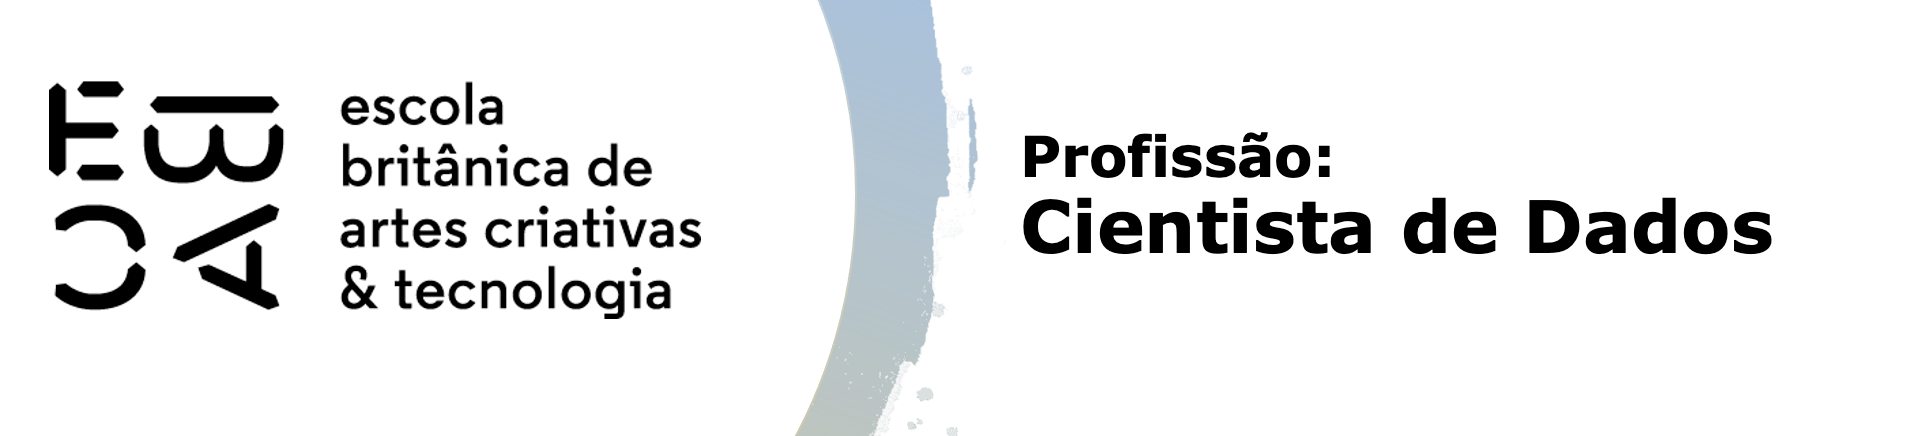

# Tarefa

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t as t_distribution
from scipy.stats import ttest_ind

In [12]:
pg = sns.load_dataset('penguins')

In [13]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

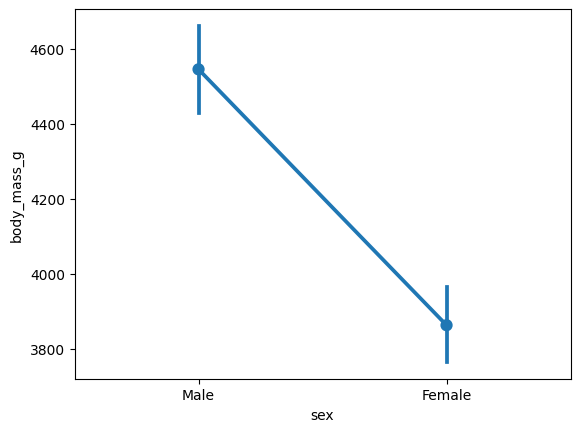

In [14]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [15]:
# Carregar os dados
pg = sns.load_dataset('penguins')

# Realizar o teste T
male_weights = pg[pg['sex'] == 'Male']['body_mass_g']
female_weights = pg[pg['sex'] == 'Female']['body_mass_g']

t_statistic, p_value = ttest_ind(male_weights, female_weights)

# Definir o nível de significância
alpha = 0.05

# Verificar o resultado do teste
if p_value < alpha:
    print("Foi rejeitada a hipótese nula.")
    print("Existem evidências estatísticas de uma diferença de peso entre machos e fêmeas.")
else:
    print("Não podemos rejeitar a hipótese nula.")
    print("Não há evidências estatísticas de uma diferença de peso entre machos e fêmeas.")


Foi rejeitada a hipótese nula.
Existem evidências estatísticas de uma diferença de peso entre machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

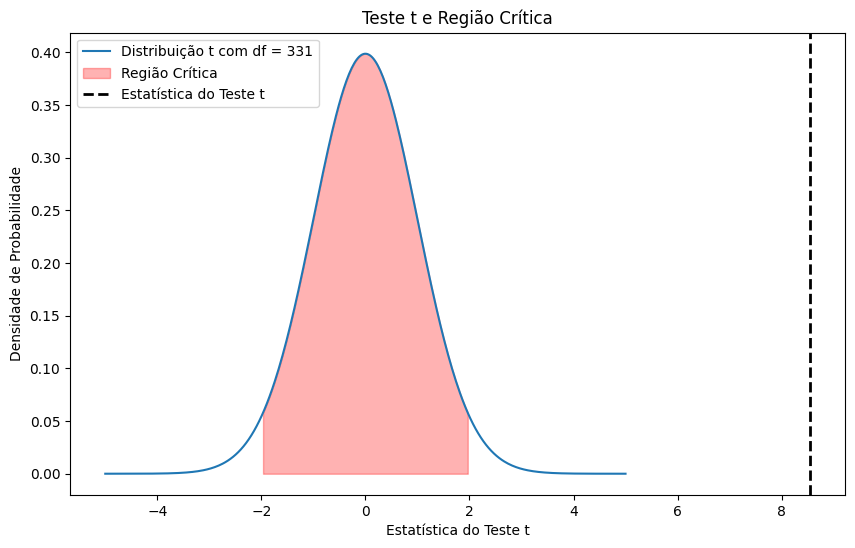

In [16]:
# Carregar os dados
pg = sns.load_dataset('penguins')

# Dividir os dados por gênero
male_weights = pg[pg['sex'] == 'Male']['body_mass_g']
female_weights = pg[pg['sex'] == 'Female']['body_mass_g']

# Calcular médias e desvios padrão
male_mean = np.mean(male_weights)
female_mean = np.mean(female_weights)
male_std = np.std(male_weights, ddof=1)
female_std = np.std(female_weights, ddof=1)

# Calcular o valor crítico para o nível de significância
alpha = 0.05
df = len(male_weights) + len(female_weights) - 2
t_critical = t_distribution.ppf(1 - alpha / 2, df)

# Calcular os limites da região crítica
x = np.linspace(-5, 5, 400)
y = t_distribution.pdf(x, df)
x_critical = np.linspace(-t_critical, t_critical, 400)
y_critical = t_distribution.pdf(x_critical, df)

# Plot da distribuição t e da região crítica
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t com df = {}'.format(df))
plt.fill_between(x_critical, y_critical, color='red', alpha=0.3, label='Região Crítica')
plt.axvline(t_statistic, color='black', linestyle='dashed', linewidth=2, label='Estatística do Teste t')
plt.legend()
plt.title('Teste t e Região Crítica')
plt.xlabel('Estatística do Teste t')
plt.ylabel('Densidade de Probabilidade')
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [17]:
# Carregar os dados
pg = sns.load_dataset('penguins')

# Lista de espécies únicas
species_list = pg['species'].unique()

# Definir o nível de significância
alpha = 0.05

# Loop pelas espécies e realização do teste T
for species in species_list:
    species_data = pg[pg['species'] == species]
    species_male_weights = species_data[species_data['sex'] == 'Male']['body_mass_g']
    species_female_weights = species_data[species_data['sex'] == 'Female']['body_mass_g']
    
    t_statistic, p_value = ttest_ind(species_male_weights, species_female_weights)
    
    print(f"Espécie: {species}")
    print(f"P-value: {p_value}")
    
    if p_value < alpha:
        print("Foi rejeitada a hipótese nula.")
        print("Existem evidências estatísticas de uma diferença de peso entre machos e fêmeas.")
    else:
        print("Não podemos rejeitar a hipótese nula.")
        print("Não há evidências estatísticas de uma diferença de peso entre machos e fêmeas.")
    
    print("=" * 40)

Espécie: Adelie
P-value: 2.2206436307866114e-26
Foi rejeitada a hipótese nula.
Existem evidências estatísticas de uma diferença de peso entre machos e fêmeas.
Espécie: Chinstrap
P-value: 2.043956471470739e-06
Foi rejeitada a hipótese nula.
Existem evidências estatísticas de uma diferença de peso entre machos e fêmeas.
Espécie: Gentoo
P-value: 2.133687602018886e-28
Foi rejeitada a hipótese nula.
Existem evidências estatísticas de uma diferença de peso entre machos e fêmeas.
